___
# **BME 5710 project report**
## Instructor -- Rizwan Ahmad (ahmad.46@osu.edu)
## BME5710 -- Spring 2025 

___
### Provide descriptive answers at `???` locations and insert figures or tables at `?content?`

In [5]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot sub-library as "plt"
from matplotlib import image as mping

___
### Write your name below. 

Answer: Dhaarini Prasad Sudha

___
### Write the names of your teammates

Answer: Kate Herr, Robert Smith, Luca Medvedovic

___
### (1.1 -- 5%) Provide a layout of your CNN

#### The layout should provide all the necessary details about the CNN architecture including number of channels, size of convolution kernels, activation functions, etc. For inspiration, see examples [here](https://www.geeksforgeeks.org/u-net-architecture-explained/), [here](https://www.researchgate.net/figure/The-architecture-of-Unet_fig2_334287825), and [here](https://www.researchgate.net/figure/Modified-U-net-network-architecture_fig2_356216368)

# CNN Architecture Overview

Our team's proposed CNN architecture consists of 20 layers organized into four main stages: feature extraction, two upscaling paths with skip connections, downscaling, and output generation. This CNN network progressively upsamples the low-resolution input images from 128×128 to 256×256 and temporarily to 512×512 to recover fine details before refining and producing the final high-resolution output.


## 1. Feature Extraction
| Layer No. | Layer Name         | Output Size         | Kernel Size | Stride | Padding | Activation | Channels |
|:---------|:-------------------|:--------------------|:------------|:-------|:---------|:-----------|:---------|
| 1        | conv1               | (80 × 128 × 128)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 2        | conv1b              | (80 × 128 × 128)     | 3×3         | 1      | 1       | ReLU        | 80       |

---

## 2. Upscaling Path 1 (128 → 256)
| Layer No. | Layer Name         | Output Size         | Kernel Size | Stride | Padding | Activation | Channels | Notes |
|:---------|:-------------------|:--------------------|:------------|:-------|:---------|:-----------|:---------|:------|
| 3        | upscale1_conv       | (320 × 128 × 128)    | 3×3         | 1      | 1       | -          | 320      | Prepare for PixelShuffle |
| 4        | pixel_shuffle1      | (80 × 256 × 256)     | -           | -      | -       | -          | 80       | PixelShuffle (×2 Upsample) |
| 5        | conv2               | (80 × 256 × 256)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 6        | conv2b              | (80 × 256 × 256)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 7        | bskip1              | (80 × 256 × 256)     | -           | -      | -       | -          | 80       | Bicubic interpolation from 128×128 |
| 8        | conv_after_skip1    | (80 × 256 × 256)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 9        | conv_after_skip1b   | (80 × 256 × 256)     | 3×3         | 1      | 1       | ReLU        | 80       |

---

## 3. Upscaling Path 2 (256 → 512)
| Layer No. | Layer Name         | Output Size         | Kernel Size | Stride | Padding | Activation | Channels | Notes |
|:---------|:-------------------|:--------------------|:------------|:-------|:---------|:-----------|:---------|:------|
| 10       | upscale2_conv       | (320 × 256 × 256)    | 3×3         | 1      | 1       | -          | 320      | Prepare for PixelShuffle |
| 11       | pixel_shuffle2      | (80 × 512 × 512)     | -           | -      | -       | -          | 80       | PixelShuffle (×2 Upsample) |
| 12       | conv3               | (80 × 512 × 512)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 13       | conv3b              | (80 × 512 × 512)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 14       | bskip2              | (80 × 512 × 512)     | -           | -      | -       | -          | 80       | Bicubic interpolation from 256×256 |
| 15       | conv_after_skip2    | (80 × 512 × 512)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 16       | conv_after_skip2b   | (80 × 512 × 512)     | 3×3         | 1      | 1       | ReLU        | 80       |

---

## 4. Downscaling Path and Output Generation
| Layer No. | Layer Name         | Output Size         | Kernel Size | Stride | Padding | Activation | Channels | Notes |
|:---------|:-------------------|:--------------------|:------------|:-------|:---------|:-----------|:---------|:------|
| 17       | downscale           | (80 × 256 × 256)     | 2×2         | 2      | 0       | -          | 80       | Downsampling by stride |
| 18       | conv4               | (80 × 256 × 256)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 19       | conv4b              | (80 × 256 × 256)     | 3×3         | 1      | 1       | ReLU        | 80       |
| 20       | conv_out_final      | (1 × 256 × 256)      | 3×3         | 1      | 1       | None        | 1        | Final super-resolved output |

---


___
### (1.2 -- 1%) List *all* non-trivial features of your CNN and the training process. This may include use of dropout, learning rate scheduling, transfer learning, data augmentation, etc. Don't include items that are visible in the layout provided above.

Answer:

1. Skip Connections with Bicubic Interpolation – We upsample features using bicubic interpolation before merging them at higher resolutions, helping the network blend fine and coarse details better.

2. Two-Stage Progressive Upsampling – The input gets upsampled in two steps (128×128 → 256×256 → 512×512) before coming back down to 256×256, helping the model recover sharper image details.

3. Custom Loss Function – Instead of just using MSE, we mix it with SSIM (with weights 0.6 and 0.4) to balance pixel accuracy and perceptual quality.

4. Learning Rate Scheduler – If the model stops improving for a while, the learning rate automatically drops by a factor of 0.05 to help fine-tune better; a A `ReduceLROnPlateau` scheduler is used here. 

5. Data Augmentation – This is where the training dataset was augmented with multiple transformations, including rotations (90°, 180°, 270°) and horizontal/vertical flips to increase the diversity of training samples and to improve generalizability. 

6. Validation-Based Model Selection – Instead of picking the final model, we always save the one that scores best on the validation set.

7. Early Stopping – If the model doesn’t get better for 25 epochs straight, we stop training early to save time and avoid overfitting.

8. Mixed Precision Training – We use half-precision (float16) where possible to speed up training and save memory without hurting accuracy; `torch.amp.autocast` and `GradScaler` is used for this. 

___
### (2.1 -- 0.5%) Provide at least ten hyperparameters that you *could* optimize in your CNN design and training.

Answer: 
1. Learning Rate - This control the size of weight updates during optimization and affects convergence speed. 
2. Batch Size - This defines the number of training samples processed before updating model weights.
3. Kernel Size - This determines the spatial dimensions of convolution filters used for feature extraction.
4. Stride - This controls how far the convolutional filter moves over the input image at each step.
5. Upscale factor - This specifies the upsampling ratio in PixelShuffle layers for increasing image resolution.
6. Number of convolutional layers - This controls the depth of the CNN and influences the network’s representational capacity.
7. Activtion function - This controls how the network learns complex patterns - examples like ReLU, Identity, Softmax etc.  
8. Droupout rate - This specifies the probability of randomly disabling neurons during training to prevent overfitting - "handicapping the network". 
9. Optimizer type - This influences how the model navigates the loss landscape - examples Adam and SGD. 
10. Number of epochs - This specifies the max number of passes over the entire training dataset during learning.
11. Number of Filters – This specifies the number of output channels in each convolutional layer. 
12. Data Augmentation Strategies – This defines different ways that the input can be transformed - examples are rotations and flips. 
13. Early Stopping Patience –  This specifies the number of epochs without improvement before terminating the training process.
14. Mixed Precision Training Settings – This determines whether to enable mixed precision and how aggressive scaling is.

___
### (2.2 -- 0.5%) Now, list the hyperparameters that you *have* optimized.

Answer: 

1. Learning Rate
2. Batch Size
3. Kernel Size
4. Stride
5. Upscale Factor
6. Number of Convolutional Layers
7. Activation Function
8. Optimizer Type
9. Number of Epochs
10. Number of Filters
11. Data Augmentation Strategies
12. Early Stopping Patience
13. Mixed Precision Training Settings


___
### (2.3 -- 0.5%) Describe your stretegy/approach for optimizing hyperparameters.

Answer:

1. Learning Rate – We started with a learning rate of 1e-4, which is the common baseline for Adam optimizer; this did not change through the process. 

2. Batch Size – We chose a batch size of 8 to fit within memory limits and provide stable gradient updates without needing further tuning;this did not change through the process. 

3. Kernel Size – We used 3×3 kernels by default; this did not change through the process. 

4. Stride – We used a stride of 1 for feature extraction and upscaling layers, and stride 2 only for downscaling. 

5. Upscale Factor – The upscale factor of ×2 was determined by the difference between input and target resolution (128×128 to 256×256); this did not change through the process. 

6. Number of Convolutional Layers – We manually designed a 20-layer architecture organized into four key stages: feature extraction, two progressive upscaling paths, and final downscaling with output generation. Feature extraction layers are used at the beginning to capture low-level image structures (edges, textures) from the low-resolution input. The first upscaling path increases the spatial resolution from 128×128 to 256×256, helping the network learn finer spatial details. The second upscaling path temporarily expands the resolution to 512×512 to allow the network to operate on an even larger feature space. the idea behind this was so that it can help in recovering lost fine details that smaller feature maps may not capture well.
Finally, the downscaling and output stage reduces the feature maps back to the target 256×256 output size, ensuring that all rich features extracted at higher resolutions are compressed back into the correct spatial dimensions. 

7. Activation Function – ReLU was selected by default for its simplicity and effectiveness; this did not change through the process. 

8. Optimizer Type – Adam was chosen initially for its faster convergence and robustness; this did not change through the process. 

9. Number of Epochs – We set a maximum of 200 epochs, but we did implement an early stopping to stop the training early if no valid improvement was seen after 25 epochs. 

10. Number of Filters – Each convolutional layer used 80 filters.

11. Data Augmentation Strategies – We applied rotations and flips during training to increase dataset diversity. 

12. Early Stopping Patience – Patience was set to 25 epochs without improvement to balance giving the model time to improve versus avoiding overtraining.

13. Mixed Precision Training Settings – Mixed precision (float16) was used to speed up training and reduce memory usage. 


___
### (2.4 -- 0.5%) What loss function did you use?  Express the loss function mathematically.

Answer:

We used a combined loss function that incorporates both Mean Squared Error (MSE) and Structural Similarity Index Measure (SSIM). The goal was to balance pixel-level accuracy (MSE) with perceptual quality (SSIM).

Mathematically, the loss function is: 

$$
\mathcal{L}_{\text{combined}} = \alpha \times \mathcal{L}_{\text{MSE}} + \beta \times (1 - \text{SSIM})
$$

where:
- $\mathcal{L}_{\text{MSE}}$ is the mean squared error between the predicted and ground truth images,
- $\text{SSIM}$ is the structural similarity index (higher is better, so we subtract it from 1 to convert it into a loss),
- $\alpha = 0.6$ and $\beta = 0.4$ are weighting factors we chose for MSE and SSIM components, respectively.


A lower MSE indicates better image quality, which is whythe  MSE is minimized. Higher `SSIM` indicates better quality, which is why 1-SSIM is minimized. The predicted image is clamped between 0 and 1 before SSIM is computed.




___
### (2.5 -- 1%) Calculate the number of learnable parameters in your final CNN. How does that number compare with the number of training samples? Is your network overfitting or underfitting and how did you arrive at that conclusion? Explain that in the context of loss vs. epoch and/or performance metric vs. epoch curve for training and validation fold.

Answer:

Our final CNN contains approximately approx. 1.24 million learnable parameters. The code to calculate this is included in the main final_code file. 

The calculation is here below: 

Parameters=(in channels×out channels×kernel height×kernel width)+(out channels)

| Layer Name          | In Channels | Out Channels | Kernel Size | Parameters |
|:--------------------|:------------|:-------------|:------------|:-----------|
| conv1                | 1           | 80           | 3×3         | (1×80×3×3) + 80 = 800 |
| conv1b               | 80          | 80           | 3×3         | (80×80×3×3) + 80 = 57,680 |
| upscale1_conv        | 80          | 320          | 3×3         | (80×320×3×3) + 320 = 230,720 |
| conv2                | 80          | 80           | 3×3         | 57,680 |
| conv2b               | 80          | 80           | 3×3         | 57,680 |
| conv_after_skip1     | 160         | 80           | 3×3         | (160×80×3×3) + 80 = 115,280 |
| conv_after_skip1b    | 80          | 80           | 3×3         | 57,680 |
| upscale2_conv        | 80          | 320          | 3×3         | 230,720 |
| conv3                | 80          | 80           | 3×3         | 57,680 |
| conv3b               | 80          | 80           | 3×3         | 57,680 |
| conv_after_skip2     | 160         | 80           | 3×3         | 115,280 |
| conv_after_skip2b    | 80          | 80           | 3×3         | 57,680 |
| downscale (stride=2) | 80          | 80           | 2×2         | (80×80×2×2) + 80 = 25,680 |
| conv4                | 80          | 80           | 3×3         | 57,680 |
| conv4b               | 80          | 80           | 3×3         | 57,680 |
| conv_out_final       | 80          | 1            | 3×3         | (80×1×3×3) + 1 = 721 |

Adding this all together gives us 1,241,321 learnable parameters, so approx. 1.24 million. 

After data augmentation, our training set went from 240 images to 2160 images. While the number of parameters is much more higher than the number of training samples, we did not observe overfitting during training. Refer to the image of the training loss progress in the main final_code diagram for this. 

The training loss(the solid red line) drop quickly in the first few epochs and then steadily decreases at a slower rate, flattening out over time. The validation loss (dashes red line) follows a very similar trend to the training loss. This suggests there is no major overfitting occuring. The validation score(the blue line) increases rapdily in the first ~10–15 epochs and then steadily increases over time, showing that the model has good generalization to unseen validation data. Laslty, around ~80–100 epochs, the validation score becomes very flat, showing the model has converged and no longer improves over the epochs. 

All together, sicne there is no growing gap between training and validation curves, there is no major overfitting. Hence, it can be concluded that the model did not heavily overfit or underfit. 


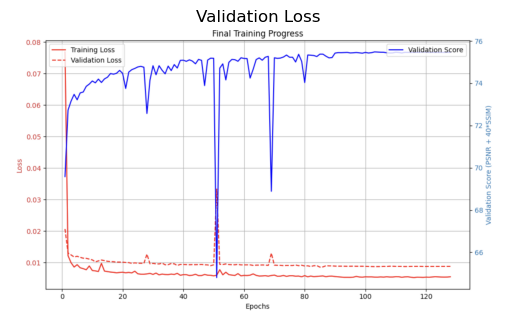

In [15]:
from matplotlib import pyplot as plt
from matplotlib import image as mping

plt.title("Validation Loss")
imageQ1 = mping.imread("validationlossgraph.png")  # <-- only the file name
plt.imshow(imageQ1)
plt.axis('off')  # optional: hide axes
plt.show()


___
### (3.1 -- 5%) Insert (or draw using Markdown) a table that provides average values of PSNR, SSIM, and PSNR + 40xSSIM for (i) interpolated low-resolution images, (ii) images super-resolved with the TrivialNet model included in `starter_code.ipynb`, and (iii) images super-resolved with your CNN. Include the metrics from training, validation, and test folds.

| Method           | Fold        | PSNR (↑) | SSIM (↑) | PSNR + 40×SSIM (↑) |
|:-----------------|:------------|:---------|:---------|:-------------------|
| Interpolated LR  | Training    | 30.50    | 0.9116   | 66.69              |
|                  | Validation  | 31.00    | 0.9074   | 67.30              |
|                  | Test        | 30.80    | 0.9192   | 67.57              |
| TrivialNet       | Training    | XX.XX    | 0.XXXX   | XX.XX              |
|                  | Validation  | XX.XX    | 0.XXXX   | XX.XX              |
|                  | Test        | XX.XX    | 0.XXXX   | XX.XX              |
| Your CNN         | Training    | 36.02    | 0.9669   | 74.69              |
|                  | Validation  | 36.63    | 0.9655   | 75.25              |
|                  | Test        | 36.61    | 0.9717   | 75.48              |


___
### (3.2 -- 1%) When it comes to comparing images, what does SSIM capture that PSNR does not?

Answer:

PSNR measures pixel-wise differences between two images based on absolute error, and it treats all pixel errors equally regardless of their visual significance.
SSIM, on the other hand, is designed to capture important perceptual factors like brightness, contrast, and structural information on the relationships between pixels. 
Therefore, SSIM is better at detecting perceptual distortions such as blurring or texture loss compared to PSNR. This means SSIM is a better indicator of visual quality. 


___
### (4.1 -- 4%) Display a figure where the first row (from left to right) shows an example of high-resolution image, interpolated low-resolution image, image super-resolved with TrivialNet, and the image super-resolved with your CNN, and the second row shows corresponding error maps after 5-fold amplification. For this figure, you may select any image from the test dataset.

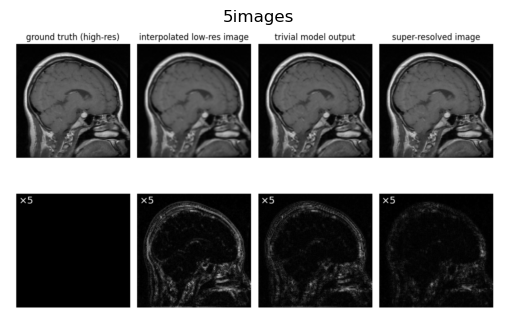

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mping

plt.title("5images")
imageQ1 = mping.imread("5images.png") 
plt.imshow(imageQ1)
plt.axis('off')  
plt.show()


___
### (4.2 -- 1%) From (4.1), subjectively identify which image features are well-preserved by your CNN and which are lost. Additionally, describe how you could further improve the performance of your model if given more time and resources.

Answer: ???